# Expression Quality Control (Part 1)
This is a template notebook for performing preliminary quality control on your organism's expression data.

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
import os

In [2]:
sns.set_style('ticks')

### Inputs

Enter path of log-TPM, MultiQC, and metadata files here

In [ ]:
logTPM_file = os.path.join('QC_Files/salmon.merged.gene_tpm.tsv')# Enter path to counts file here
multiqc_file = os.path.join('QC_Files/multiqc_fastqc_1.txt') # Enter MultiQC stats filename here
multiqc_salmon_file = os.path.join('QC_Files/multiqc_salmon.txt')
metadata_file = os.path.join('QC_Files/metadata.tsv') # Enter metadata filename here

### Load expression data

In [6]:
# take in tpm file and then take log2 of all values with psuedocount of 1
DF_log_tpm = pd.read_csv(logTPM_file,index_col=[0],sep='\t').fillna(0).drop('gene_name', axis=1)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

FileNotFoundError: [Errno 2] No such file or directory: 'QC_Files/salmon.merged.gene_tpm.csv'

In [7]:
DF_log_tpm += 1
DF_log_tpm = np.log2(DF_log_tpm)
DF_log_tpm

,yl_001,yl_002,yl_003,yl_004,yl_005,yl_006,yl_007,yl_008,yl_009,yl_010,...,yl_125,yl_126,yl_127,yl_128,yl_129,yl_130,yl_131,yl_132,yl_133,yl_134
gene_id,,,,,,,,,,,,,,,,,,,,,
gene-YALI1_A00014g,2.149698,2.124970,2.802317,2.833502,0.758881,1.321601,2.488293,1.617332,1.171998,1.573064,...,2.543021,2.572742,2.720925,2.655467,1.653597,1.420364,2.243534,1.421676,3.159357,2.988174
gene-YALI1_A00019g,3.212896,3.091169,1.998273,2.310140,1.808926,2.342025,2.917158,2.039178,3.174929,1.990159,...,3.747540,4.206630,3.238885,2.917420,2.659140,2.838105,3.115226,3.106868,4.315281,4.734701
gene-YALI1_A00032g,1.983575,1.864524,2.747599,3.093594,0.000000,0.195839,0.556255,0.826795,0.000000,0.246049,...,1.191146,1.319363,1.179742,1.048777,0.237633,0.252225,0.653268,0.000000,1.108077,1.439453
gene-YALI1_A00058g,0.670216,0.820167,1.801633,1.916780,0.400433,0.246064,0.184499,0.094194,0.078324,0.135053,...,7.250342,6.999008,2.443423,1.995394,1.170699,0.970573,0.574029,0.795188,8.356572,8.318017
gene-YALI1_A00102g,6.562419,6.389061,6.886836,6.794589,9.539226,9.347609,9.580435,10.322755,9.762035,10.381235,...,10.006692,9.945214,9.944281,10.089857,10.535861,10.671098,10.265646,10.575467,9.990295,9.888927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-YALI1_F39818g,3.293042,4.423279,4.618036,4.466959,4.745047,5.137254,3.075296,3.256166,2.568285,2.347106,...,0.000000,0.802699,0.000000,0.715660,1.849691,0.740138,0.000000,0.000000,0.000000,0.000000
gene-YALI1_F39844g,1.082352,1.346828,0.853787,1.057662,1.279353,1.702719,0.591135,0.000000,0.000000,0.000000,...,0.750023,0.227097,1.120793,0.995231,0.890365,1.416271,1.624891,1.579398,0.931885,1.036738
gene-YALI1_F39885g,4.298468,4.453964,4.167305,4.203363,4.591390,4.624866,4.227153,4.741140,4.348956,4.413501,...,4.564120,4.269303,3.997678,3.822402,3.942149,4.324771,4.289345,4.206285,4.249529,4.242194


### Load QC data
There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.

In [14]:
DF_qc_stats = pd.read_csv(multiqc_file,sep='\t',index_col='Sample')
DF_qc_stats
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 268


In [15]:
multiqc_file

'QC_Files/multiqc_fastqc_1.txt'

In [16]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats#.index

,Filename,File type,Encoding,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,total_deduplicated_percentage,avg_sequence_length,median_sequence_length,basic_statistics,per_base_sequence_quality,per_sequence_quality_scores,per_base_sequence_content,per_sequence_gc_content,per_base_n_content,sequence_length_distribution,sequence_duplication_levels,overrepresented_sequences,adapter_content
Sample,,,,,,,,,,,,,,,,,,,,
yl_001_1,yl_001_1_val_1.fq.gz,Conventional base calls,Sanger / Illumina 1.9,11209708.0,0.0,20-100,54.0,34.460946,99.119625,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
yl_001_2,yl_001_2_val_2.fq.gz,Conventional base calls,Sanger / Illumina 1.9,11209708.0,0.0,20-100,54.0,36.073148,99.111932,100,pass,pass,pass,fail,warn,pass,warn,fail,pass,pass
yl_002_1,yl_002_1_val_1.fq.gz,Conventional base calls,Sanger / Illumina 1.9,13660495.0,0.0,18-100,54.0,32.509177,99.194819,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
yl_002_2,yl_002_2_val_2.fq.gz,Conventional base calls,Sanger / Illumina 1.9,13660495.0,0.0,18-100,54.0,34.297757,99.076425,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
yl_003_1,yl_003_1_val_1.fq.gz,Conventional base calls,Sanger / Illumina 1.9,13580549.0,0.0,18-100,54.0,31.828382,99.192133,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yl_132_2,yl_132_2_val_2.fq.gz,Conventional base calls,Sanger / Illumina 1.9,12022556.0,0.0,20-100,55.0,28.740118,98.999182,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
yl_133_1,yl_133_1_val_1.fq.gz,Conventional base calls,Sanger / Illumina 1.9,12147859.0,0.0,18-100,55.0,36.254637,99.181894,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass
yl_133_2,yl_133_2_val_2.fq.gz,Conventional base calls,Sanger / Illumina 1.9,12147859.0,0.0,18-100,55.0,30.374856,99.130552,100,pass,pass,pass,fail,pass,pass,warn,fail,pass,pass


In [17]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']
DF_qc_stats = DF_qc_stats[fastqc_fail_cols]
DF_qc_stats

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
Sample,,,,
yl_001_1,pass,pass,pass,pass
yl_001_2,pass,pass,pass,pass
yl_002_1,pass,pass,pass,pass
yl_002_2,pass,pass,pass,pass
yl_003_1,pass,pass,pass,pass
...,...,...,...,...
yl_132_2,pass,pass,pass,pass
yl_133_1,pass,pass,pass,pass
yl_133_2,pass,pass,pass,pass


In [18]:
DF_qc_dict = {}
for index in DF_qc_stats.index: #iterate through all rows of dataframe
    #check if row is an "_1" read
    if(index.endswith("_1")):
        start = index[:-2]
        pair = start + "_2"
        if pair in DF_qc_stats.index: #if paired read exists
            values = []
            for column in DF_qc_stats.columns:
                values.append(DF_qc_stats.loc[index,column] and DF_qc_stats.loc[pair,column])
            DF_qc_dict.setdefault(start, values)
        else: #if pairerd read does not exist
            values = []
            for column in DF_qc_stats.columns:
                values.append(DF_qc_stats.loc[index,column])
            DF_qc_dict.setdefault(start, values)
    elif(not index.endswith("_2")): #if the read does not follow the above patterns
            values = []
            for column in DF_qc_stats.columns:
                values.append(DF_qc_stats.loc[index,column])
            DF_qc_dict.setdefault(index, values)
            
DF_qc_final = pd.DataFrame.from_dict(DF_qc_dict, orient='index')           
DF_qc_final

,0,1,2,3
yl_001,pass,pass,pass,pass
yl_002,pass,pass,pass,pass
yl_003,pass,pass,pass,pass
yl_004,pass,pass,pass,pass
yl_005,pass,pass,pass,pass
...,...,...,...,...
yl_130,pass,pass,pass,pass
yl_131,pass,pass,pass,pass
yl_132,pass,pass,pass,pass
yl_133,pass,pass,pass,pass


In [20]:
DF_salmon_multiqc = pd.read_csv(multiqc_salmon_file,sep='\t', index_col='Sample')
assert(set(DF_salmon_multiqc.index) - set(DF_qc_final.index) == set())



In [21]:
DF_salmon_multiqc

,salmon_version,samp_type,opt_type,quant_errors,num_libraries,library_types,frag_dist_length,frag_length_mean,frag_length_sd,seq_bias_correct,...,num_processed,num_mapped,num_decoy_fragments,num_dovetail_fragments,num_fragments_filtered_vm,num_alignments_below_threshold_for_mapped_fragments_vm,percent_mapped,call,start_time,end_time
Sample,,,,,,,,,,,,,,,,,,,,,
yl_001,1.10.1,none,vb,[],1,['IU'],1001,173.139906,56.256969,False,...,11209708,7293609,1936408,219195,2275857,1281939,65.065111,quant,Sat Jun 14 00:34:55 2025,Sat Jun 14 00:35:48 2025
yl_002,1.10.1,none,vb,[],1,['IU'],1001,177.364112,59.479592,False,...,13660495,8714261,2513086,263646,2978317,1722134,63.791693,quant,Sat Jun 14 00:38:35 2025,Sat Jun 14 00:39:47 2025
yl_003,1.10.1,none,vb,[],1,['IU'],1001,174.164103,57.357246,False,...,13580549,8382796,2369236,227574,2708540,1346871,61.726488,quant,Sat Jun 14 00:37:06 2025,Sat Jun 14 00:38:09 2025
yl_004,1.10.1,none,vb,[],1,['IU'],1001,171.088699,56.991501,False,...,14297011,8972508,2388825,272951,2795359,1509904,62.757929,quant,Sat Jun 14 00:40:17 2025,Sat Jun 14 00:41:25 2025
yl_005,1.10.1,none,vb,[],1,['IU'],1001,181.631837,62.444265,False,...,16528411,11175964,2632403,318313,3100933,1879824,67.616687,quant,Sat Jun 14 00:44:33 2025,Sat Jun 14 00:45:52 2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yl_130,1.10.1,none,vb,[],1,['ISR'],1001,244.409289,90.498001,False,...,12042558,8979676,1810005,113855,2036026,1269889,74.566184,quant,Sat Jun 14 00:50:43 2025,Sat Jun 14 00:51:40 2025
yl_131,1.10.1,none,vb,[],1,['ISR'],1001,277.237848,92.739670,False,...,12123947,8371502,2417724,71768,2641464,1292285,69.049312,quant,Sat Jun 14 00:54:40 2025,Sat Jun 14 00:55:40 2025
yl_132,1.10.1,none,vb,[],1,['ISR'],1001,259.276143,89.974366,False,...,12022556,8620567,2109910,79129,2388600,1414476,71.703280,quant,Sat Jun 14 00:54:40 2025,Sat Jun 14 00:55:40 2025


In [22]:
DF_qc_final = DF_qc_final.join(DF_salmon_multiqc["num_mapped"])
DF_qc_final

,0,1,2,3,num_mapped
yl_001,pass,pass,pass,pass,7293609
yl_002,pass,pass,pass,pass,8714261
yl_003,pass,pass,pass,pass,8382796
yl_004,pass,pass,pass,pass,8972508
yl_005,pass,pass,pass,pass,11175964
...,...,...,...,...,...
yl_130,pass,pass,pass,pass,8979676
yl_131,pass,pass,pass,pass,8371502
yl_132,pass,pass,pass,pass,8620567
yl_133,pass,pass,pass,pass,8649808


### Load metadata

In [23]:
DF_metadata = pd.read_csv(metadata_file,index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 134


,File name,Condition,Project,Reference Condition,Strain,Mode of operation,Media,Limitation,C-source,Growth rate,DO,pH,Temperature,Read1,Read2
ID,,,,,,,,,,,,,,,
yl_001,20210204-YL-CN-1,Glucose_Nlimit,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft-N limited,Nitrogen,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-CN-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-CN-1A_2.fq.gz
yl_002,20210204-YL-CN-2,Glucose_Nlimit,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft-N limited,Nitrogen,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-CN-2A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-CN-2A_2.fq.gz
yl_003,20210204-YL-fill-1,Glucose_lowDO,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,Low,6,30,ylipolytic2025_repeat/20210204-YL-fill-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-fill-1A_2.fq.gz
yl_004,20210204-YL-fill-2,Glucose_lowDO,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,Low,6,30,ylipolytic2025_repeat/20210204-YL-fill-2A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-fill-2A_2.fq.gz
yl_005,20210204-YL-ref-1,Glucose_shaken_reference,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-ref-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-ref-1A_2.fq.gz


### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [24]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_final.index) == set())

In [25]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_final = DF_qc_final.loc[DF_log_tpm.columns]

## Check QC statistics

### FastQC quality control

In [26]:
fastqc_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

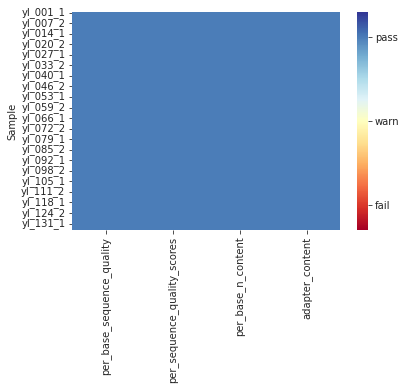

In [27]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

The following four categories are the most important:
* per_base_sequence_quality
* per_sequence_quality_scores
* per_base_n_content
* adapter_content
    
If a sample does not pass any of these four categories, discard the sample.

In [28]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [29]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
Sample,,,,


Mark samples that passed.

In [30]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

### Number of aligned reads

The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.

In [31]:
min_mrna_reads = 500000 # Minimum number of reads mapped to mRNA (500,000)

Text(0.5, 1.0, 'Number of reads mapped to CDS')

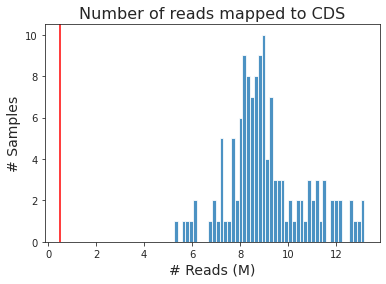

In [33]:
fig,ax = plt.subplots()
ax.hist(DF_qc_final['num_mapped']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

Identify samples with poor read depth:

In [35]:
DF_failed_mrna = DF_qc_final[DF_qc_final['num_mapped'] < min_mrna_reads].sort_values('num_mapped')
DF_failed_mrna

,0,1,2,3,num_mapped


Mark samples that passed.

In [36]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

### Examine Global Correlations

Only examine data that passed the first two steps.

In [37]:
metadata_passed_step2 = DF_metadata[DF_metadata[['passed_fastqc','passed_reads_mapped_to_CDS']].all(axis=1)]
DF_log_tpm_passed_step2 = DF_log_tpm[metadata_passed_step2.index]

A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [38]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors + cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

/tmp/ipykernel_108868/3271226688.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


Number of cluster:  9


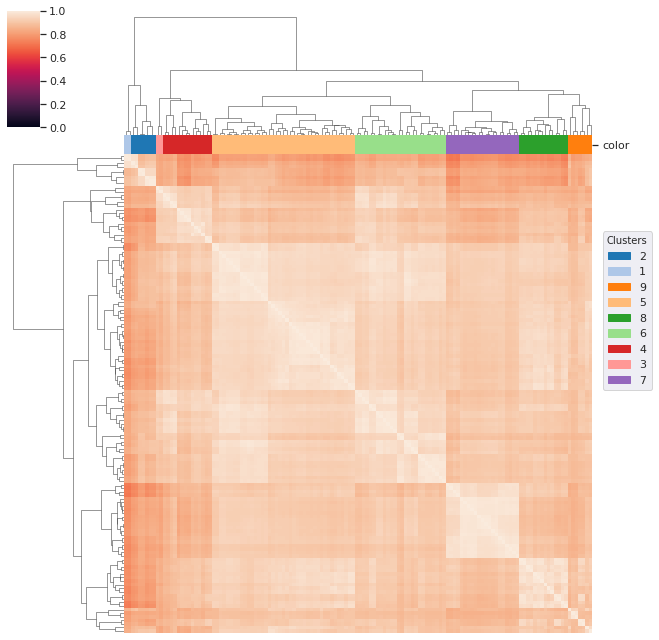

In [39]:
clusters = global_clustering(DF_log_tpm_passed_step2)

Select clusters to remove.

In [40]:
remove_clusters = []
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [59]:
clusters[clusters.isin([1])]

yl_050    1
yl_051    1
yl_064    1
yl_065    1
Name: cluster, dtype: int32

Re-cluster samples to ensure all outliers were removed.

In [41]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

/tmp/ipykernel_108868/3271226688.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


Number of cluster:  9


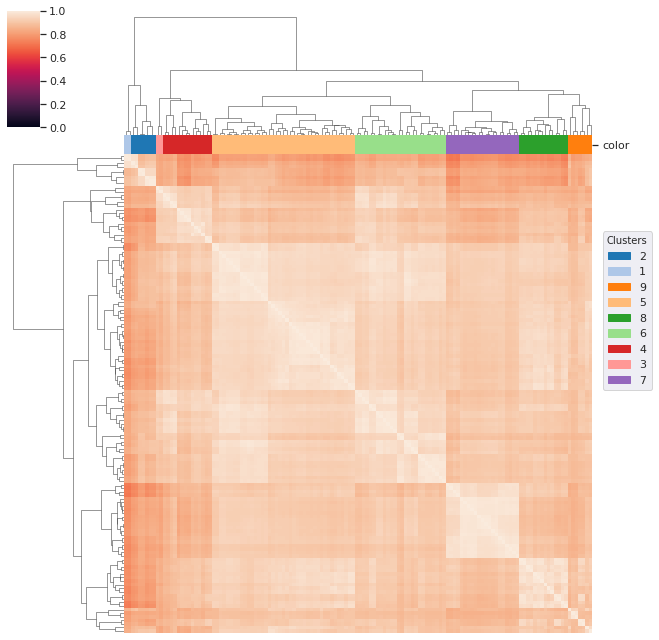

In [42]:
clusters = global_clustering(DF_log_tpm_passed_step3)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [43]:
DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

# Remove failed samples

In [44]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [45]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

In [46]:
(pass_qc.value_counts().reindex([False,True]).fillna(0))

False      0.0
True     134.0
dtype: float64

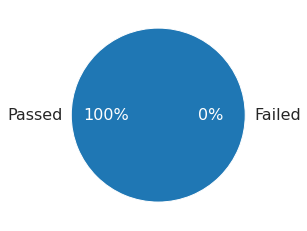

In [47]:
_,_,pcts = plt.pie(pass_qc.value_counts().reindex([False,True]).fillna(0),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [52]:
metadata_all_qc_file = path.join('QC_Files/metadata_qc_part1_all.tsv') # Enter filename for full metadata QC file
metadata_qc_file = path.join('QC_Files/metadata_qc_part1.tsv') # Enter filename for metadata QC file with only passing datasets
log_tpm_file = path.join('QC_Files/log_tpm.tsv')

In [53]:
DF_metadata.to_csv(metadata_all_qc_file, sep='\t')
DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')
DF_log_tpm.to_csv(log_tpm_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.

Once the metadata has been curated, proceed to [Step 2](https://github.com/avsastry/modulome-workflow/edit/main/3_quality_control/expression_QC_part2.ipynb)